# ***Decision Tree*** Clasificacion
## Aprendizaje automático de maquina

## **Librerias**

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entramar los datos
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #usar las metricas de errores, para verificar que los datos estan bien
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_text, plot_tree

## **Importar el dataset**

In [190]:
data_ori=pd.read_csv('databases\Diabetes_data.csv')
data=data_ori.copy()

## **Preprocesamiento de los datos**




In [191]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [192]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64 



In [193]:
data = data[data['Age']>0]

In [194]:
print(f'Número de filas: {data.shape[0]}, Número de columnas: {data.shape[1]}') #Número de filas y columnas
print(data.head()) #Visualización del dataset

Número de filas: 998, Número de columnas: 9
   Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0  


In [195]:
print(data.nunique()) #Diferentes tipos de valores por columna

Pregnancies                   8
Glucose                     998
BloodPressure               998
SkinThickness               998
Insulin                     998
BMI                         998
DiabetesPedigreeFunction    998
Age                         998
Diagnosis                     2
dtype: int64


In [196]:
correlaciones = data.corrwith(data['Diagnosis']).sort_values()
print(correlaciones)

Age                        -0.042583
BMI                        -0.031440
Glucose                    -0.004420
Pregnancies                 0.000109
SkinThickness               0.001585
BloodPressure               0.008018
Insulin                     0.035280
DiabetesPedigreeFunction    0.062595
Diagnosis                   1.000000
dtype: float64


# **Insights**

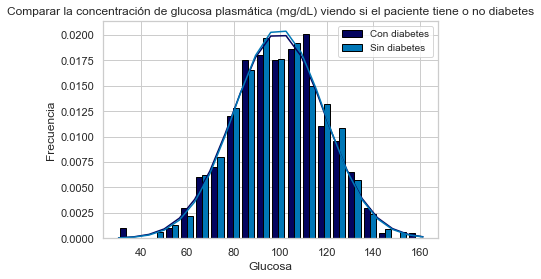

In [197]:
#Comparar la concentración de glucosa plasmática (mg/dL) viendo si el paciente tiene o no diabetes
fig, ax = plt.subplots()
x=[data[data['Diagnosis']==1]['Glucose'], data[data['Diagnosis']==0]['Glucose']]
n, bins, patches=ax.hist(x, bins=20, density = True, histtype = "bar", color=["#03045e", "#0077b6"], edgecolor = 'Black', label=['Con diabetes','Sin diabetes'])
ax.legend(prop={'size': 10})
sigma1 = x[0].std()
mu1    = x[0].mean()

y1 = ((1 / (np.sqrt(2 * np.pi) * sigma1)) *
     np.exp(-0.5 * (1 / sigma1 * (bins - mu1))**2))
ax.plot(bins, y1, '-', color="#03045e")

sigma2 = x[1].std()
mu2    = x[1].mean()

y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) *
     np.exp(-0.5 * (1 / sigma2 * (bins - mu2))**2))
ax.plot(bins, y2, '-', color="#0077b6")

plt.title('Comparar la concentración de glucosa plasmática (mg/dL) viendo si el paciente tiene o no diabetes')
plt.ylabel('Frecuencia')
plt.xlabel('Glucosa')
plt.show()

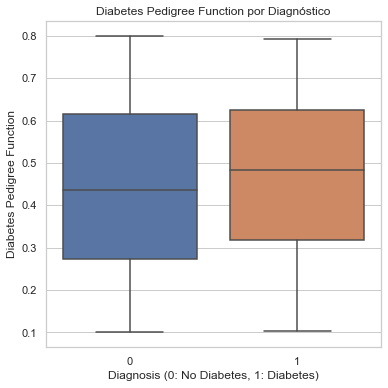

In [198]:
df = {
    'DiabetesPedigreeFunction': data['DiabetesPedigreeFunction'],
    'Number of Pregnancies': data['Pregnancies'],
    'Diagnosis': data['Diagnosis']
}

df = pd.DataFrame(df)


sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.boxplot(x='Diagnosis', y='DiabetesPedigreeFunction', data=df)

plt.xlabel('Diagnosis (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Diabetes Pedigree Function por Diagnóstico')

plt.show()

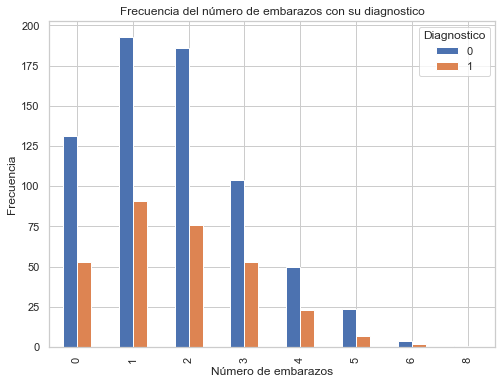

In [199]:
#Agrupar por numero de embarazos y mirar el número de diagnosticos
df = pd.crosstab(data['Pregnancies'], data['Diagnosis'])

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
df.plot(kind='bar', ax=ax)

# Personalizar el gráfico
plt.xlabel('Número de embarazos')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del número de embarazos con su diagnostico')
plt.legend(title='Diagnostico')

# Mostrar el gráfico
plt.show()

# **Arból de clasificación**

Preparacion y separacion de datos para el modelo.

In [200]:
data['Diagnosis'].value_counts()

0    693
1    305
Name: Diagnosis, dtype: int64

In [201]:
X = data.drop(['Diagnosis'],axis=1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=884)

Aun que la mayoria de modelos necesitan estandarizar los datos de entrada, para los arboles de decision y random forest no se necesita estandarizar, en algunos casos puede dañar el modelo.

```
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
```

## **Análisis de profundidad y de criterios**

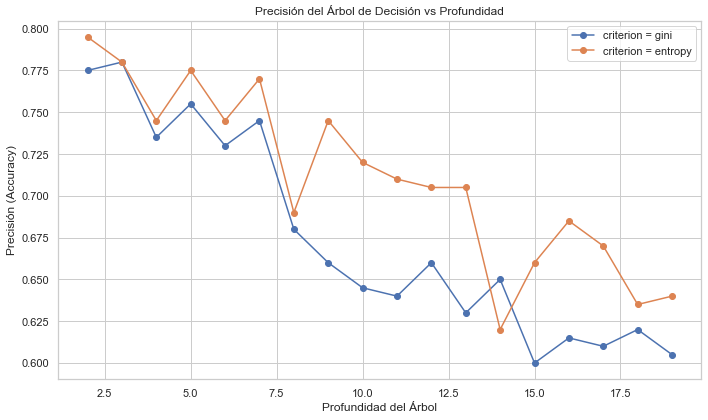

In [202]:
criterions = ['gini', 'entropy']
depths = list(range(2, 20))

results = pd.DataFrame(columns=['criterion', 'depth', 'accuracy'])

for criterion in criterions:
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=911)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        #guardar resultado
        results = results.append({
            'criterion': criterion,
            'depth': depth,
            'accuracy': acc
        }, ignore_index=True)

#grafica
plt.figure(figsize=(10, 6))
for criterion in criterions:
    subset = results[results['criterion'] == criterion]
    plt.plot(subset['depth'], subset['accuracy'], marker='o', label=f'criterion = {criterion}')

plt.title('Precisión del Árbol de Decisión vs Profundidad')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Precisión (Accuracy)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver que la mejor profundidad respecto a la precisión obtenida es 2, y el mejor criterio es entropy.

## **Arból de clasificación**

Preparacion y separacion de datos para el modelo.

In [203]:
tree_ = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=911)
tree_.fit(X_train,y_train)
y_pred = tree_.predict(X_test)

In [209]:
print(f'La precisión del modelo es: {accuracy_score(y_test,y_pred)}')
print(f'La matriz de confusión es:\n {confusion_matrix(y_test,y_pred)}', '\n')

La precisión del modelo es: 0.795
La matriz de confusión es:
 [[158   3]
 [ 38   1]] 



In [207]:
print(export_text(tree_, feature_names=list(X.columns)))

|--- DiabetesPedigreeFunction <= 0.33
|   |--- Age <= 64.16
|   |   |--- class: 0
|   |--- Age >  64.16
|   |   |--- class: 0
|--- DiabetesPedigreeFunction >  0.33
|   |--- BMI <= 18.22
|   |   |--- class: 1
|   |--- BMI >  18.22
|   |   |--- class: 0



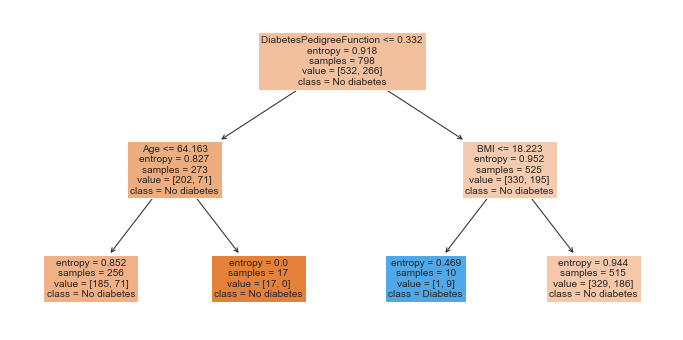

In [ ]:
#Visualización del árbol
plt.figure(figsize=(12,6))
_ = plot_tree(tree_, feature_names=X.columns, class_names=['No diabetes', 'Diabetes'], filled=True)

### **Verificación de los resultados**

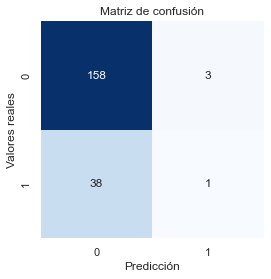

In [208]:
#matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#grafica
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

# **Conclusiones**

**Respecto a los insights, podemos decir que:**
- La glucosa no es un factor reelevante a la hora de decidir si la persona tiene diabetes o no.
- Existe una ligera diferencia entre los diagnosticados con diabetes y los que no, la cuál es que los diagnosticados tienden a tener un valor de la Función diabetes pedigree más alto que los que no, con lo que podemos concluir que el historial familiar afecta un poco.
- El número de diagnosticos positivos se concentra entre 0 y 3 embarazos.

**Respecto al dataset:**
- No tenía datos nulos y los errores respecto a las columnas (edades negativas) eran mínimos.
- Teniamos muchos diagnosticos negativos, por lo que a la hora de analizar los datos, podemos tener cesgos.

**Respecto al árbol de clasificación:**
- Después de hacer el análisis de profundidad, concluimos que la mejor altura era **2**, ya que nos daba el mejor valor de presición. Además, esto se podía ver intuitivamente dado que usar una profundidad muy alta produce un **overfitting** en el modelo, es decir, prepara el árbol exclusivamente para datos del dataset, y no para nuevos datos que pueda recibir, por lo cual no está aprendiendo sino repitiendo.
- Después del análisis de criterios, podemos ver que los mejores dos son **entropy**, esto al ver el valor de decisión que obtenemos.
- Dependiendo de la semilla que se use, la precisión va a variar, esto porque puede tomar todos los diagnosicos negativos para entrenar y los positivos para testear, o viceversa.
- Se usaron métodos gráficos para visualizar facílmente el proceso realizado por el modelo.
- Viendo la matriz de confusión, confirmamos que la cantidad de diagnosticos positivos es mucho menor que los negativos, por lo que el dataset puede estar cesgado, que genera que el modelo esta altamente **desbalanceado** ya que no detecta los grupos minoritarios.
